In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
calories=pd.read_csv('calories.csv')
excercise=pd.read_csv('exercise.csv')

In [3]:
calories=pd.concat([excercise, calories['Calories']],axis=1)

In [4]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
sns.set()

Text(0.5, 1.0, 'Count of genders')

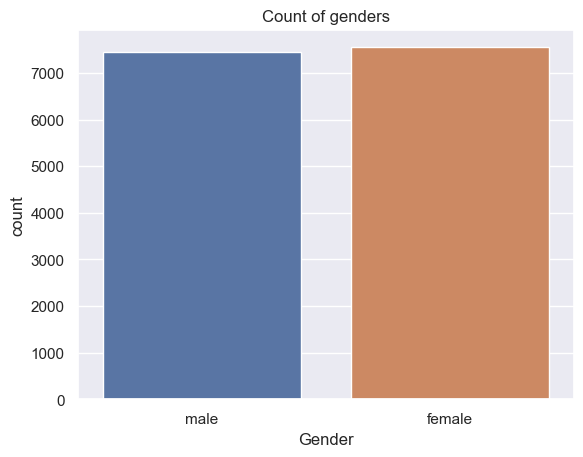

In [6]:
sns.countplot(x='Gender', data=calories)
plt.title('Count of genders')

In [7]:
numericdata = calories.select_dtypes(include=['int64', 'float64'])

In [8]:
numericdata.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(calories, cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [13]:

calories.replace({"Gender": {'male': '0', 'female': '1'}}, inplace=True)


In [14]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [23]:
#seperating features and targets
X=calories.drop(columns=['User_ID','Calories','Gender'],axis=1)
Y=calories['Calories']

In [24]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [25]:
print(X)

       Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       68   190.0    94.0      29.0       105.0       40.8
1       20   166.0    60.0      14.0        94.0       40.3
2       69   179.0    79.0       5.0        88.0       38.7
3       34   179.0    71.0      13.0       100.0       40.5
4       27   154.0    58.0      10.0        81.0       39.8
...    ...     ...     ...       ...         ...        ...
14995   20   193.0    86.0      11.0        92.0       40.4
14996   27   165.0    65.0       6.0        85.0       39.2
14997   43   159.0    58.0      16.0        90.0       40.1
14998   78   193.0    97.0       2.0        84.0       38.3
14999   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 6 columns]


In [26]:
#splitting the data into training and testing data
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 6) (12000, 6) (3000, 6)


In [28]:
#model training
model=XGBRegressor()

In [29]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
#evaluation
test_data_prediction=model.predict(X_test)

In [31]:
print(test_data_prediction)

[127.66284  217.11703   36.980682 ... 146.00682   23.630262  90.783676]


In [32]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [33]:
#ERROR(MAE)
mae=metrics.mean_absolute_error(Y_test, test_data_prediction)

In [34]:
print(mae)

2.429606904198726
